In [1]:
import orjson as json
import pandas as pd
import tqdm

In [2]:
players = []

for line in tqdm.tqdm(open('data/train_matches.jsonl')):
    game = json.loads(line)
    for p in game['players']:
        players.append(p['account_id_hash'])

for line in tqdm.tqdm(open('data/test_matches.jsonl')):
    game = json.loads(line)
    for p in game['players']:
        players.append(p['account_id_hash'])

39675it [01:14, 529.23it/s]
10000it [00:17, 562.86it/s]


In [3]:
game.keys()

dict_keys(['game_time', 'match_id_hash', 'teamfights', 'objectives', 'chat', 'game_mode', 'lobby_type', 'players'])

In [4]:
player = game['players'][0]

In [5]:
player.keys()

dict_keys(['player_slot', 'hero_id', 'hero_name', 'account_id_hash', 'ability_upgrades', 'obs_placed', 'sen_placed', 'creeps_stacked', 'camps_stacked', 'rune_pickups', 'firstblood_claimed', 'teamfight_participation', 'towers_killed', 'roshans_killed', 'observers_placed', 'stuns', 'max_hero_hit', 'times', 'gold_t', 'lh_t', 'dn_t', 'xp_t', 'obs_log', 'sen_log', 'obs_left_log', 'sen_left_log', 'purchase_log', 'kills_log', 'buyback_log', 'runes_log', 'obs', 'sen', 'actions', 'pings', 'purchase', 'gold_reasons', 'xp_reasons', 'killed', 'item_uses', 'ability_uses', 'hero_hits', 'damage', 'damage_taken', 'damage_inflictor', 'runes', 'killed_by', 'kill_streaks', 'multi_kills', 'life_state', 'healing', 'damage_inflictor_received', 'randomed', 'pred_vict', 'gold', 'lh', 'xp', 'x', 'y', 'hero_inventory', 'hero_stash', 'health', 'max_health', 'max_mana', 'level', 'kills', 'deaths', 'assists', 'denies', 'nearby_creep_death_count'])

In [6]:
player['account_id_hash']

'1c2500195e6ab646fc9371344724aa77'

In [40]:
player['actions']

{'1': 3326,
 '2': 51,
 '4': 184,
 '5': 51,
 '6': 15,
 '7': 3,
 '8': 46,
 '9': 57,
 '10': 5,
 '11': 12,
 '15': 27,
 '16': 24,
 '17': 1,
 '19': 4,
 '24': 2,
 '33': 5}

In [10]:
df = pd.DataFrame(players, columns=['account_id_hash'])

In [15]:
len(df), len(df.account_id_hash.unique())

(496750, 189167)

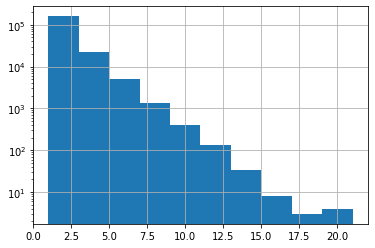

In [39]:
df.groupby('account_id_hash').account_id_hash.size().sort_values(ascending=False)[1:].hist(log=True);